In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Distributions

In [2]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

h=rand(Float64,12)

12-element Vector{Float64}:
 0.8870057630885827
 0.7786110685561456
 0.778133719757051
 0.48814592916887345
 0.8223845761224904
 0.5222599923393735
 0.49607911761101486
 0.6061534139809615
 0.8638132175024055
 0.7278421634609484
 0.9880173735749045
 0.2983769889836484

In [3]:
o=pi/4;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o),RZ(o)));
#ZRow=copy(kronecker(RZ(h[1]*o),RZ(h[2]*o),RZ(h[3]*o),RZ(h[4]*o),RZ(h[5]*o),RZ(h[6]*o),RZ(h[7]*o),RZ(h[8]*o),RZ(h[9]*o),RZ(h[10]*o),RZ(h[11]*o),RZ(h[12]*o)));
UOdd=copy(kronecker(REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT))
UEven=copy(kronecker(I(2),REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT,REVCNOT*CNOT,I(2)));

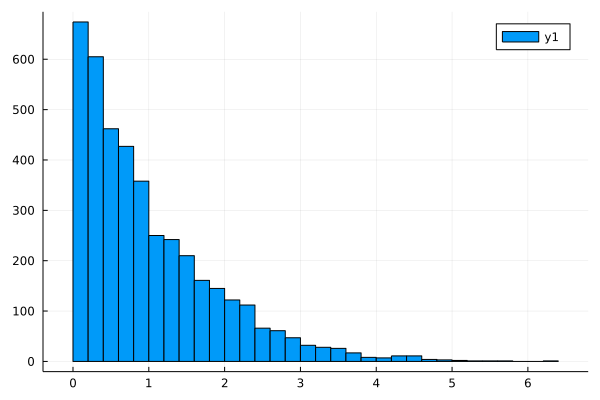

In [4]:
lambda=0.8;


UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

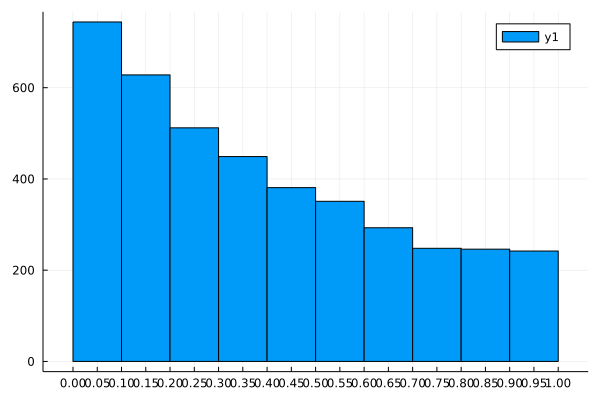

In [5]:

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n, xticks =  0:0.05:1)

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1423
┌ Warning: You are using Matplotlib 3.3.4, which is no longer
│ officialy supported by the Plots community. To ensure smooth Plots.jl
│ integration update your Matplotlib library to a version >= 3.4.0
│ 
│ If you have used Conda.jl to install PyPlot (default installation),
│ upgrade your matplotlib via Conda.jl and rebuild the PyPlot.
│ 
│ If you are not sure, here are the default instructions:
│ 
│ In Julia REPL:
│ ```
│ import Pkg;
│ Pkg.add("Conda")
│ import Conda
│ Conda.update()
│ Pkg.build("PyPlot")
│ ```
│ 
└ @ Plots /home/sghosh/physik/.julia/packages/Plots/GGa6i/src/backends/pyplot.jl:29


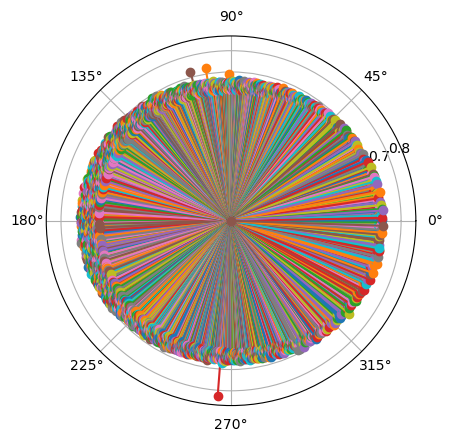

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2280>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2400>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f99a160>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02fa115b0>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2640>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2820>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2a00>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2be0>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2dc0>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9b2fa0>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f99afa0>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9be370>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff02f9be550>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x7ff01e73bb80>]
 [PyObject <matplotlib.lines.Line2D object at 0x7ff01e73bd60>]
 [PyOb

In [6]:
using PyPlot
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [ ]:
ordpar=fill(0.1,30);


for l in 1:30
    lambda=1-((l-1)*0.002);
   
UEven1=(1-lambda)*I(dim(UEven))+lambda*UEven;
UOdd1=(1-lambda)*I(dim(UEven))+lambda*UOdd;

A=copy(XRow*ZRow*UEven1*ZRow*XRow*ZRow*UOdd1*ZRow);


EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)*length(EigA)

   
   

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end
   
   
   
ordpar[l]=mean(n);
end



xax=1:length(ordpar)
plot(xax,ordpar)